In [89]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json

# LA Water data extracted from a public csv file on Kaggle
# https://www.kaggle.com/cityofLA/ladwp-water-supply-in-acre-feet

# Call CSV files to the py script
La = "Resources/ladwp-water-supply-in-acre-feet.csv"

# Read the csv files
la_df = pd.read_csv(La)

#print the first 5 rows of the LA df
la_df.head(3)

,Date Value,Fiscal Year,MWD,LA Aqueduct,Local Groundwater,Recycled Water,Total Acre Feet,MWD % of Total,LA Aqueduct % of Total,Local Groundwater % of Total,Recycled Water % of Total
0,1970-06-30T00:00:00.000,1969-70,146981,355422,83627,0,586030,25.1,60.6,14.3,0.0
1,1971-06-30T00:00:00.000,1970-71,52194,454160,73847,0,580201,9.0,78.3,12.7,0.0
2,1972-06-30T00:00:00.000,1971-72,59852,469185,75033,0,604070,9.9,77.7,12.4,0.0


In [4]:
# Check the data types for each column
la_df.dtypes

Date Value                       object
Fiscal Year                      object
MWD                               int64
LA Aqueduct                       int64
Local Groundwater                 int64
Recycled Water                    int64
Total Acre Feet                   int64
MWD % of Total                  float64
LA Aqueduct % of Total          float64
Local Groundwater % of Total    float64
Recycled Water % of Total       float64
dtype: object

In [47]:
# Column renaming
columns = [
    "Date Value",
    "Recycled Water",
    "LA Aqueduct % of Total",
    "Local Groundwater % of Total",
    "Recycled Water % of Total"]

# Pull the year value from the date
date = la_df["Date Value"].str[:4]
date = date.astype(int)

# Assign the values for each column in the new dataframe
Recycled = la_df["Recycled Water"]
Total_LA_Aqueduct_Percent = la_df["LA Aqueduct % of Total"]
Total_LA_AcreFt = la_df["Total Acre Feet"]
Local_Recycled_Percent = la_df["Local Groundwater % of Total"]
Total_Recycled_Percent = la_df["Local Groundwater % of Total"]

# Assign the data set to recycle
Recycle = pd.DataFrame({"Date": date, 
                    "Recycled water": Recycled,
                    "Total Acre Feet": Total_LA_AcreFt,
                    "LA Aqueduct % of Total": Total_LA_Aqueduct_Percent,
                    "Local Groundwater % of Total": Local_Recycled_Percent,
                    "Recycled Water % of Total": Total_Recycled_Percent
                    })
Recycle.head()

,Date,Recycled water,Total Acre Feet,LA Aqueduct % of Total,Local Groundwater % of Total,Recycled Water % of Total
0,1970,0,586030,60.6,14.3,14.3
1,1971,0,580201,78.3,12.7,12.7
2,1972,0,604070,77.7,12.4,12.4
3,1973,0,571218,80.3,14.0,14.0
4,1974,0,562984,81.9,13.6,13.6


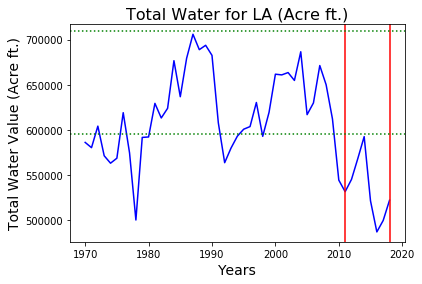

In [88]:
# Plot recyled data graph
plt.plot(date, Total_LA_AcreFt, color="blue", label="Danger Drop")
plt.axvline(x=2011, color="red")
plt.axvline(x=2018, color="red")
plt.axhline(y=595000, color="g", linestyle=":")
plt.axhline(y=709500, color="g", linestyle=":")
# Label the recycled data graph
plt.title("Total Water for LA (Acre ft.)", fontsize=16)
plt.ylabel("Total Water Value (Acre ft.)", fontsize=14)
plt.xlabel("Years", fontsize=14)
plt.show()

# Analysis Findings for Total Water for LA

* The water usage for Los Angeles seems to be higher before the drought, than during the drought.
* The peak value 1986 was roughly 709,500 Acre ft.
* The 2004 the peak value was roughly 600,000 Acre ft

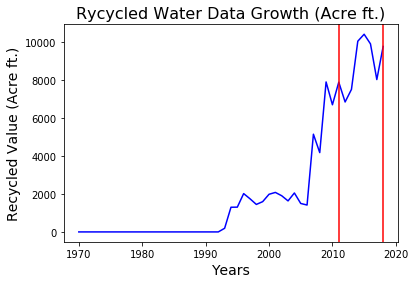

In [80]:
# Plot recyled data graph
plt.plot(date, Recycled, color="blue", label="Danger Drop")
plt.axvline(x=2011, color="red")
plt.axvline(x=2018, color="red")
# Label the recycled data graph
plt.title("Rycycled Water Data Growth (Acre ft.)", fontsize=16)
plt.ylabel("Recycled Value (Acre ft.)", fontsize=14)$
plt.xlabel("Years",fontsize=14)
plt.show()

# Analysis Findings For Recycled Water Data Growth

* The recycled water usage for Los Angeles seemed to have a large jump during the drought period
* The peak value within the drought was 2004, similar to the year vlaue in the total water usage graph.
* The 2004 the peak value was roughly 10,000 Acre ft

In [44]:
# Create png file of Recycled water graph
plt.savefig("AcreFoot_WaterGraph.png")

<Figure size 432x288 with 0 Axes>

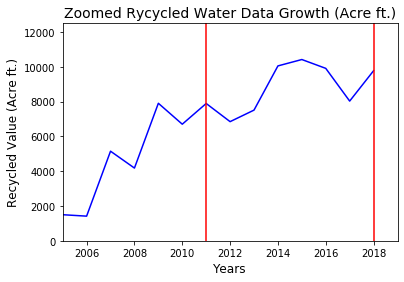

In [73]:
# Recycling data zoomed
plt.plot(date, Recycled, color="blue", label="Danger Drop")
plt.axvline(x = 2011, color="red")
plt.axvline(x=2018, color="red")
# label graph
plt.title("Zoomed Rycycled Water Data Growth (Acre ft.)", fontsize=14)
plt.ylabel("Recycled Value (Acre ft.)", fontsize=12)
plt.xlabel("Years", fontsize=12)
# Changed the x axis
plt.xlim(2005,2019)
plt.ylim(0,12500)
plt.show()

# This is a zoomed in version of the upper graph on Recycled yearly data

In [19]:
# Create zoomed graph acre 
plt.savefig("Zoomed_acreFoot_WaterGraph.png")

<Figure size 432x288 with 0 Axes>

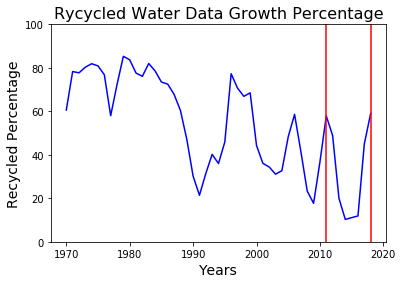

In [77]:
# plot the recycled data percentage
plt.plot(date, Total_LA_Aqueduct_Percent, color="blue", label="Danger Drop")
plt.axvline(x=2011, color="red")
plt.axvline(x=2018, color="red")
plt.ylim(0,100)
# label graph
plt.title("Rycycled Water Data Growth Percentage", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Recycled Percentage", fontsize=14)
plt.show()

# Analysis For Recycled Water Data Growth Percentage
* The reduction of water usage potential caused a reduciton of percentage of water being recyled within Californait 

In [21]:
# Save png of recycled water data percentage
plt.savefig("percentWaterGraph.png")

<Figure size 432x288 with 0 Axes>